In [1]:
# Dependencies
import os
import csv
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sn
import pandas as pd
import numpy as np

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [2]:
csv_path = "Resources/Official.csv"
#Read the CSV into a Panda DataFrame
data = pd.read_csv(csv_path)
data.head ()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,99556.0,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,99503.0,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,99744.0,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,99559.0,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,99652.0,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282


In [3]:
#Checking datatype
data['Total Collection Expenditures']

0          4030.0
1       1152280.0
2          3508.0
3         14801.0
4         21552.0
          ...    
9166     112968.0
9167     130105.0
9168          0.0
9169      25317.0
9170      16443.0
Name: Total Collection Expenditures, Length: 9171, dtype: float64

In [4]:
data.shape

(9171, 46)

In [5]:
data.columns

Index(['State', 'Library ID', 'Submission Year', 'Library Name',
       'Street Address', 'City', 'Zip Code', 'Longitude', 'Latitude',
       'State Code', 'County Code', 'County', 'County Population',
       'Print_Collection_Expenditures', 'Digital_Collection_Expenditures',
       'Total Collection Expenditures', 'Total Operating Expenditures',
       'Print Collection', 'Digital Collection', 'Audio Collection',
       'Library Visits', 'Registered Users', 'Name', 'median_household_income',
       'total_population', 'median_age', 'per_capita', 'education_none',
       'education_high_school', 'education_ged', 'education_associates',
       'education_bachelors', 'education_masters', 'education_professional',
       'education_doctorate', 'state', 'zipcode', 'year',
       'education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'edu

In [6]:
expenditures = [0, 1000, 5000, 10000, 15000, 20000, 30000]
x_axis = np.arange(len(expenditures))

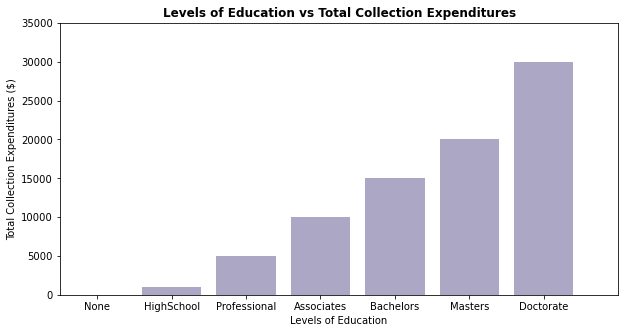

In [7]:
plt.figure(figsize=(10,5))

plt.bar(x_axis, expenditures, color='#58508D', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["None", "HighSchool", "Professional", "Associates", "Bachelors", "Masters", "Doctorate"])

# Sets the x limits of the current chart
plt.xlim(-0.5, 7)

# Sets the y limits of the current chart
plt.ylim(0,35000)

# Give our chart some labels and a tile
plt.title("Levels of Education vs Total Collection Expenditures", fontweight="bold")
plt.xlabel("Levels of Education")
plt.ylabel("Total Collection Expenditures ($)")

plt.show()

# Linear Regressions  Education Percentages vs Total Collection Expenditures

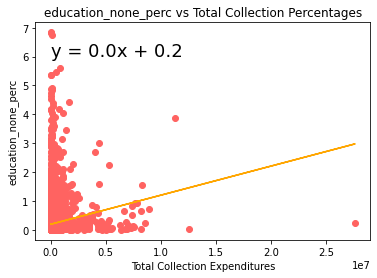

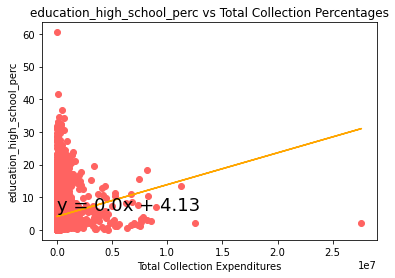

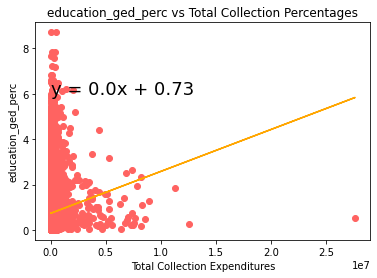

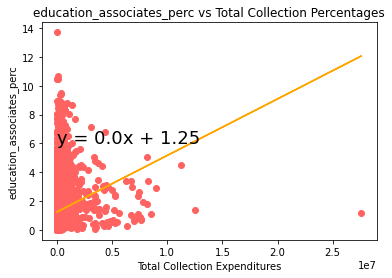

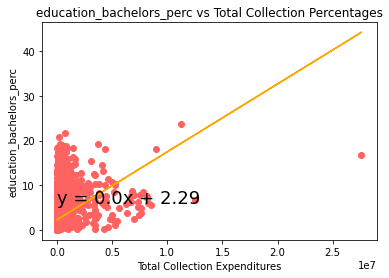

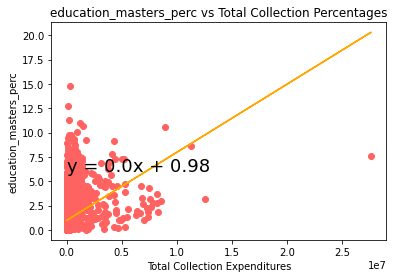

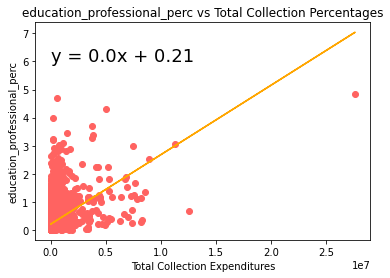

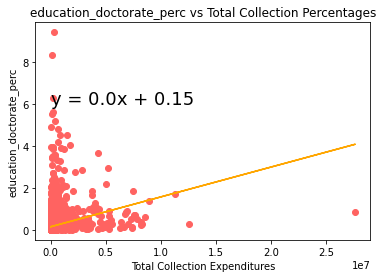

In [8]:
#Source from Weatherpy homework
#create linear regression between education percentages vs total collection expenditures

percentages= ['education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'education_doctorate_perc']

for perc in percentages:
   
    # Add the linear regression equation and line to plot
    x_values = data["Total Collection Expenditures"] 
    y_values = data[perc]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color="#FF6361")
    plt.plot(x_values,regress_values,"#FFA600")
    plt.annotate(line_eq,(2,6),fontsize=18,color="black")
    plt.xlabel('Total Collection Expenditures')
    plt.ylabel(f"{perc}")
    plt.title(f'{perc} vs Total Collection Percentages')
    plt.show()

# Total Collection Expenditures vs None

In [9]:
feature = data["Total Collection Expenditures"]
target = data["education_none_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     education_none_perc   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.018
Method:                  Least Squares   F-statistic:                     171.6
Date:                 Sat, 12 Feb 2022   Prob (F-statistic):           7.45e-39
Time:                         00:47:18   Log-Likelihood:                -5512.7
No. Observations:                 9171   AIC:                         1.103e+04
Df Residuals:                     9169   BIC:                         1.104e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1955      0.005     41.360      0.000       0.186       0.205
Total Collection Expenditures  1.008e-07   7.69e-09     13.099      0.000    8.57e-08    1.16e-07
==============================================================================
Omnibus:                    10224.208   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1013900.417
Skew:                           5.736   Prob(JB):                         0.00
Kurtosis:                      53.217   Cond. No.                     6.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.00764824e-07]
0.19554675330673604


In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [12]:
actual = data["education_none_perc"]
predictions = reg.predict(data["Total Collection Expenditures"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)
mape = mean_absolute_percentage_error(actual, predictions)

print(f"R2 (Adjusted R Squared): {r2}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mse)}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MAPE (Mean Absolute Percentage Error):{mape}")

R2 (Adjusted R Squared): 0.018369384387875498
MSE (Mean Squared Error): 0.19482224821490293
RMSE (Root Mean Squared Error): 0.4413867331659425
MAE (Mean Absolute Error): 0.23192827393278884
MAPE (Mean Absolute Percentage Error):124660379891186.78


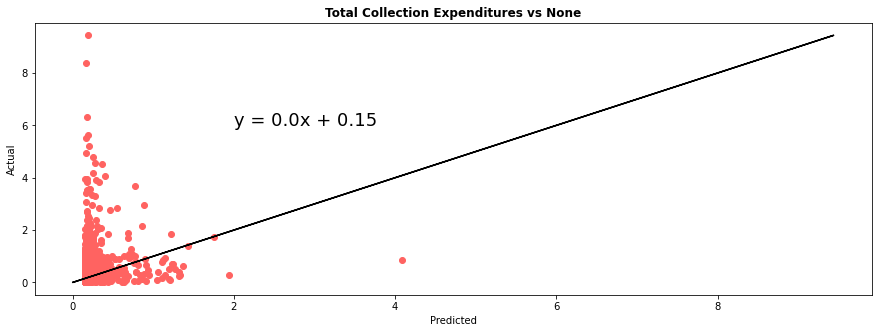

In [45]:
plt.figure(figsize=(15,5))

plt.scatter(predictions, actual, color="#FF6361")
plt.plot(actual, actual, color="black")
plt.annotate(line_eq,(2,6),fontsize=18,color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Total Collection Expenditures vs None", fontweight="bold")


plt.show()

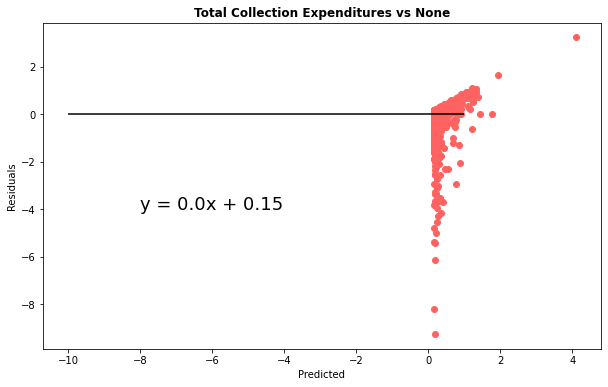

In [53]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FF6361")
plt.hlines(0, -10, 1, color="black")
plt.annotate(line_eq,(-8,-4),fontsize=18,color="black")


plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Total Collection Expenditures vs None", fontweight="bold")

plt.show()

# Total Collection Expenditures vs High School

In [15]:
feature =  data["Total Collection Expenditures"]
target = data["education_high_school_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     education_high_school_perc   R-squared:                       0.014
Model:                                    OLS   Adj. R-squared:                  0.014
Method:                         Least Squares   F-statistic:                     131.5
Date:                        Sat, 12 Feb 2022   Prob (F-statistic):           3.16e-30
Time:                                00:47:19   Log-Likelihood:                -27537.
No. Observations:                        9171   AIC:                         5.508e+04
Df Residuals:                            9169   BIC:                         5.509e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             4.1265      0.052     79.055      0.000       4.024       4.229
Total Collection Expenditures  9.738e-07   8.49e-08     11.465      0.000    8.07e-07    1.14e-06
==============================================================================
Omnibus:                     4266.108   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26918.855
Skew:                           2.161   Prob(JB):                         0.00
Kurtosis:                      10.194   Cond. No.                     6.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[9.73750642e-07]
4.1264643939969154


In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

actual = data["education_high_school_perc"]
predictions = reg.predict(data["Total Collection Expenditures"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2 (Adjusted R Squared): {r2}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mse)}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MAPE (Mean Absolute Percentage Error):{mape}")

R2 (Adjusted R Squared): 0.014134518140482832
MSE (Mean Squared Error): 23.746484398318263
RMSE (Root Mean Squared Error): 4.873036465933562
MAE (Mean Absolute Error): 3.5195696263342104
MAPE (Mean Absolute Percentage Error):124660379891186.78


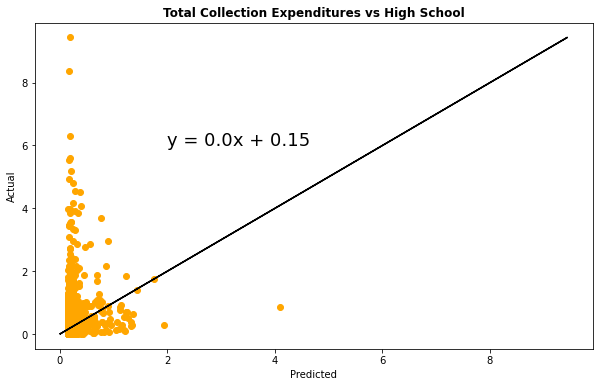

In [57]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FFA600")
plt.plot(actual, actual, color="black")
plt.annotate(line_eq,(2,6),fontsize=18,color="black")


plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Total Collection Expenditures vs High School", fontweight="bold")

plt.show()

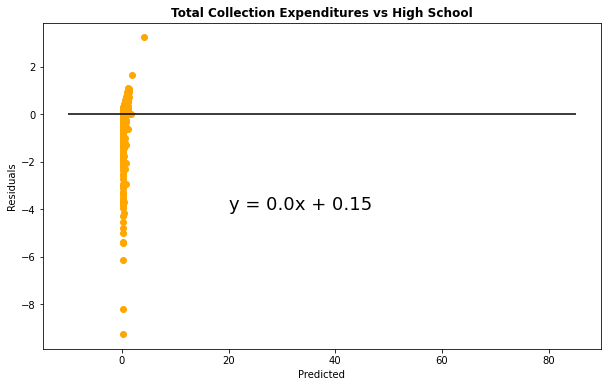

In [59]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FFA600")
plt.hlines(0, -10, 85, color="black")
plt.annotate(line_eq,(20,-4),fontsize=18,color="black")


plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Total Collection Expenditures vs High School", fontweight="bold")

plt.show()

# Total Collection Expenditures vs Professional

In [20]:
feature =  data["Total Collection Expenditures"]
target = data["education_professional_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     education_professional_perc   R-squared:                       0.151
Model:                                     OLS   Adj. R-squared:                  0.151
Method:                          Least Squares   F-statistic:                     1630.
Date:                         Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                                 00:47:19   Log-Likelihood:                -3431.6
No. Observations:                         9171   AIC:                             6867.
Df Residuals:                             9169   BIC:                             6882.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2065      0.004     54.810      0.000       0.199       0.214
Total Collection Expenditures  2.475e-07   6.13e-09     40.375      0.000    2.36e-07     2.6e-07
==============================================================================
Omnibus:                     5863.753   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98925.251
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      18.077   Cond. No.                     6.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[2.47533484e-07]
0.20652707979248985


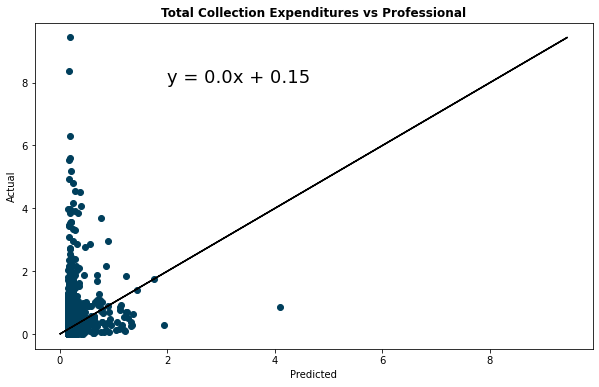

In [62]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#003F5C")
plt.plot(actual, actual, color="black")
plt.annotate(line_eq,(2,8),fontsize=18,color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Total Collection Expenditures vs Professional", fontweight="bold")

plt.show()

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

actual = data["education_professional_perc"]
predictions = reg.predict(data["Total Collection Expenditures"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2 (Adjusted R Squared): {r2}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mse)}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MAPE (Mean Absolute Percentage Error):{mape}")

R2 (Adjusted R Squared): 0.15094949143521263
MSE (Mean Squared Error): 0.12374764338533416
RMSE (Root Mean Squared Error): 0.35177783242457755
MAE (Mean Absolute Error): 0.2291751752718987
MAPE (Mean Absolute Percentage Error):124660379891186.78


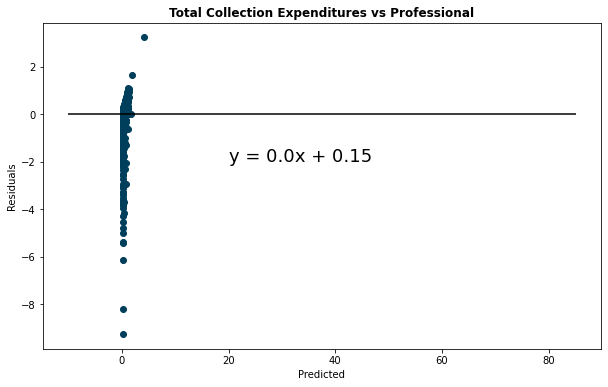

In [63]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#003F5C")
plt.hlines(0, -10, 85, color="black")
plt.annotate(line_eq,(20,-2),fontsize=18,color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Total Collection Expenditures vs Professional", fontweight="bold")

plt.show()

# Total Collection Expenditures vs Associates

In [25]:
feature =  data["Total Collection Expenditures"]
target = data["education_associates_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     education_associates_perc   R-squared:                       0.025
Model:                                   OLS   Adj. R-squared:                  0.025
Method:                        Least Squares   F-statistic:                     234.7
Date:                       Sat, 12 Feb 2022   Prob (F-statistic):           2.49e-52
Time:                               00:47:20   Log-Likelihood:                -16533.
No. Observations:                       9171   AIC:                         3.307e+04
Df Residuals:                           9169   BIC:                         3.308e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.2511      0.016     79.570      0.000       1.220       1.282
Total Collection Expenditures  3.919e-07   2.56e-08     15.320      0.000    3.42e-07    4.42e-07
==============================================================================
Omnibus:                     3551.079   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15007.394
Skew:                           1.891   Prob(JB):                         0.00
Kurtosis:                       7.997   Cond. No.                     6.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[3.91930196e-07]
1.2511065052365165


In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

actual = data["education_associates_perc"]
predictions = reg.predict(data["Total Collection Expenditures"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2 (Adjusted R Squared): {r2}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mse)}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MAPE (Mean Absolute Percentage Error):{mape}")

R2 (Adjusted R Squared): 0.02495842215538957
MSE (Mean Squared Error): 2.1547188612713595
RMSE (Root Mean Squared Error): 1.4678960662360805
MAE (Mean Absolute Error): 1.0811246131639207
MAPE (Mean Absolute Percentage Error):124660379891186.78


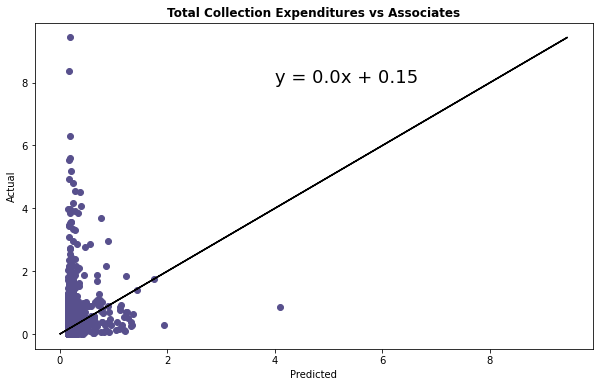

In [65]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#58508D")
plt.plot(actual, actual, color="black")
plt.annotate(line_eq,(4,8),fontsize=18,color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Total Collection Expenditures vs Associates", fontweight="bold")

plt.show()

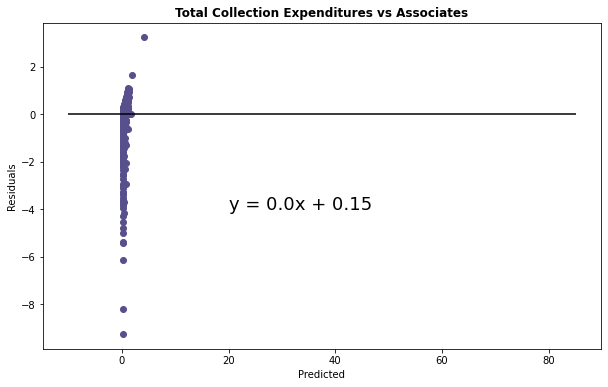

In [67]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#58508D")
plt.hlines(0, -10, 85, color="black")
plt.annotate(line_eq,(20,-4),fontsize=18,color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Total Collection Expenditures vs Associates", fontweight="bold")

plt.show()

# Total Collection Expenditures vs Bachelors

In [30]:
feature =  data["Total Collection Expenditures"]
target = data["education_bachelors_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_bachelors_perc   R-squared:                       0.088
Model:                                  OLS   Adj. R-squared:                  0.088
Method:                       Least Squares   F-statistic:                     887.5
Date:                      Sat, 12 Feb 2022   Prob (F-statistic):          3.15e-186
Time:                              00:47:20   Log-Likelihood:                -22867.
No. Observations:                      9171   AIC:                         4.574e+04
Df Residuals:                          9169   BIC:                         4.575e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.2911      0.031     73.039      0.000       2.230       2.353
Total Collection Expenditures   1.52e-06    5.1e-08     29.791      0.000    1.42e-06    1.62e-06
==============================================================================
Omnibus:                     3379.887   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15068.402
Skew:                           1.763   Prob(JB):                         0.00
Kurtosis:                       8.196   Cond. No.                     6.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.52045085e-06]
2.29109456539803


In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

actual = data["education_bachelors_perc"]
predictions = reg.predict(data["Total Collection Expenditures"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2 (Adjusted R Squared): {r2}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mse)}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MAPE (Mean Absolute Percentage Error):{mape}")

R2 (Adjusted R Squared): 0.08824951634508038
MSE (Mean Squared Error): 8.575818746264462
RMSE (Root Mean Squared Error): 2.9284498879551384
MAE (Mean Absolute Error): 2.1407352229989955
MAPE (Mean Absolute Percentage Error):124660379891186.78


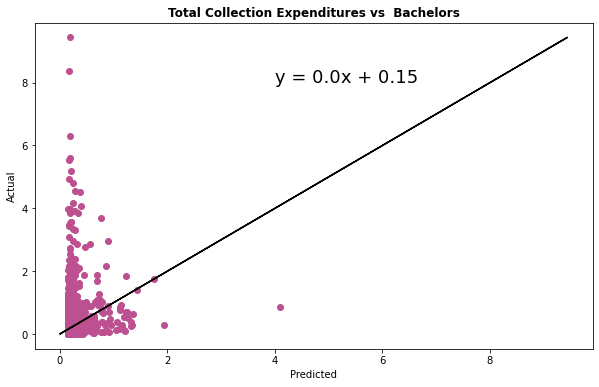

In [69]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#BC5090")
plt.plot(actual, actual, color="black")
plt.annotate(line_eq,(4,8),fontsize=18,color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Total Collection Expenditures vs  Bachelors", fontweight="bold")

plt.show()

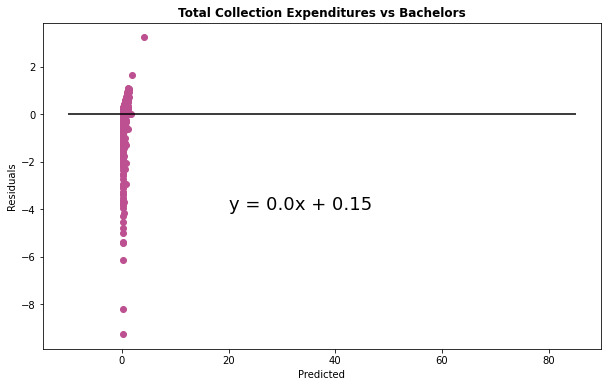

In [71]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#BC5090")
plt.hlines(0, -10, 85, color="black")
plt.annotate(line_eq,(20,-4),fontsize=18,color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Total Collection Expenditures vs Bachelors", fontweight="bold")

plt.show()

# Total Collection Expenditures vs Masters

In [35]:
feature =  data["Total Collection Expenditures"]
target = data["education_masters_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     education_masters_perc   R-squared:                       0.089
Model:                                OLS   Adj. R-squared:                  0.089
Method:                     Least Squares   F-statistic:                     897.2
Date:                    Sat, 12 Feb 2022   Prob (F-statistic):          3.81e-188
Time:                            00:47:21   Log-Likelihood:                -15703.
No. Observations:                    9171   AIC:                         3.141e+04
Df Residuals:                        9169   BIC:                         3.142e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.9819      0.014     68.362      0.000       0.954       1.010
Total Collection Expenditures      7e-07   2.34e-08     29.953      0.000    6.54e-07    7.46e-07
==============================================================================
Omnibus:                     4301.957   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33588.520
Skew:                           2.096   Prob(JB):                         0.00
Kurtosis:                      11.386   Cond. No.                     6.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[6.9998079e-07]
0.9818814797252118


In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

actual = data["education_masters_perc"]
predictions = reg.predict(data["Total Collection Expenditures"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2 (Adjusted R Squared): {r2}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mse)}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MAPE (Mean Absolute Percentage Error):{mape}")

R2 (Adjusted R Squared): 0.08912623020402055
MSE (Mean Squared Error): 1.7980098114017187
RMSE (Root Mean Squared Error): 1.3408988818705603
MAE (Mean Absolute Error): 0.9506147338215624
MAPE (Mean Absolute Percentage Error):124660379891186.78


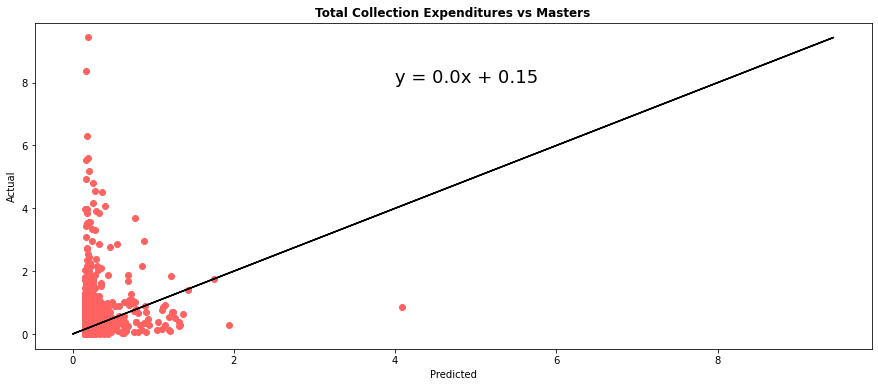

In [77]:
plt.figure(figsize=(15,6))

plt.scatter(predictions, actual, color="#FF6361")
plt.plot(actual, actual, color="black")
plt.annotate(line_eq,(4,8),fontsize=18,color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Total Collection Expenditures vs Masters", fontweight="bold")

plt.show()

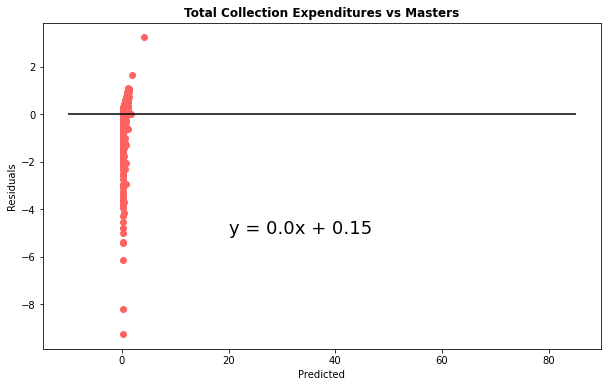

In [78]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FF6361")
plt.hlines(0, -10, 85, color="black")
plt.annotate(line_eq,(20,-5),fontsize=18,color="black")


plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Total Collection Expenditures vs Masters", fontweight="bold")

plt.show()

# Total Collection Expenditures vs Doctorate

In [40]:
feature =  data["Total Collection Expenditures"]
target = data["education_doctorate_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_doctorate_perc   R-squared:                       0.053
Model:                                  OLS   Adj. R-squared:                  0.053
Method:                       Least Squares   F-statistic:                     517.4
Date:                      Sat, 12 Feb 2022   Prob (F-statistic):          1.85e-111
Time:                              00:47:21   Log-Likelihood:                -3632.9
No. Observations:                      9171   AIC:                             7270.
Df Residuals:                          9169   BIC:                             7284.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1526      0.004     39.631      0.000       0.145       0.160
Total Collection Expenditures  1.425e-07   6.27e-09     22.746      0.000     1.3e-07    1.55e-07
==============================================================================
Omnibus:                    13107.536   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6646840.162
Skew:                           8.338   Prob(JB):                         0.00
Kurtosis:                     133.829   Cond. No.                     6.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.42545086e-07]
0.15264362102199833


In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

actual = data["education_doctorate_perc"]
predictions = reg.predict(data["Total Collection Expenditures"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2 (Adjusted R Squared): {r2}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mse)}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MAPE (Mean Absolute Percentage Error):{mape}")

R2 (Adjusted R Squared): 0.0534117695487496
MSE (Mean Squared Error): 0.12929918541773833
RMSE (Root Mean Squared Error): 0.3595819592495407
MAE (Mean Absolute Error): 0.17837246127230028
MAPE (Mean Absolute Percentage Error):124660379891186.78


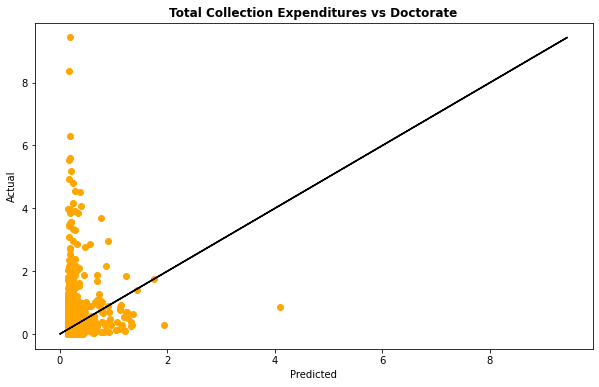

In [43]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FFA600")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Total Collection Expenditures vs Doctorate", fontweight="bold")

plt.show()

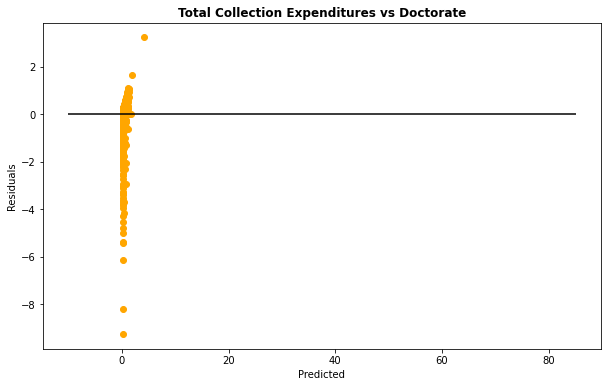

In [44]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FFA600")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Total Collection Expenditures vs Doctorate", fontweight="bold")

plt.show()

# Independent Ttest

In [ ]:
#Source Lesson plan Project 1 - Ins_ttest

In [140]:
# Generate some fake data to test with
def gendata(loc=0, loc1=0, loc2=0):
    sample1 = stats.norm.rvs(size=1000, random_state=42)
    sample2 = stats.norm.rvs(loc=loc, size=500, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(sample1)), sample1, label="S1 - Control Group", color="#FF6361")
    plt.scatter(range(len(sample2)), sample2, label="S2 - Test Group",color="#58508D")
    plt.legend()
    plt.show()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(sample1, 20, density=True, alpha=0.7, label="S1 - Control Group", color="#FF6361")
    plt.hist(sample2, 20, density=True, alpha=0.7, label="S2 - Test Group", color="#58508D")
    plt.axvline(sample1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    plt.show()
    
    return sample1, sample2

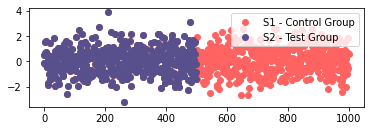

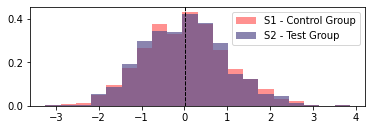

In [141]:
sample1, sample2 = gendata()

In [142]:
np.mean(sample1)

0.01933205582232549

In [143]:
np.mean(sample2)

0.006837994588647575

In [144]:
np.var(sample1)

0.9579049897315173

In [145]:
np.var(sample2)

0.9609322195872657

In [151]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(sample1, sample2, equal_var=False)

Ttest_indResult(statistic=37.47083182146725, pvalue=1.922525423972379e-192)

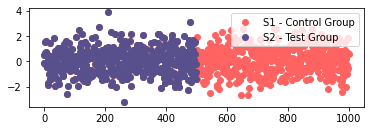

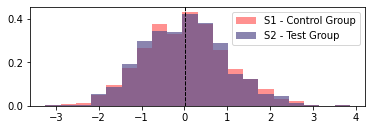

In [154]:
# Generate data with a bigger difference in means
sample1, sample2 = gendata(loc1=0, loc2=1)

In [155]:
stats.ttest_1samp(sample1, sample2.mean())

Ttest_1sampResult(statistic=0.40348292121840285, pvalue=0.6866793400410505)

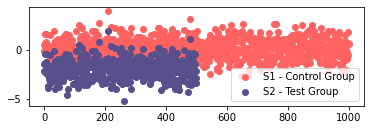

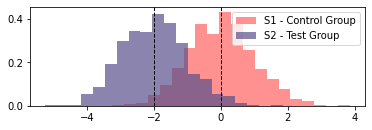

In [153]:
# Generate data with a bigger difference in means
sample1, sample2 = gendata(loc=-2)

In [152]:
# NULL
#There is NO DIFFERENCE in the averages between these two samples.

# ALTERNATIVE
#There is a DIFFERENCE in the averages between these two samples.


#Reject the NULL p<.05/.1.  There is enough evidence to reject the NULL. 
#Statistically, there is a significant difference in the averages between these two samples.
